In [259]:
import pandas as pd
import numpy as np
import riskfolio as rp
import matplotlib.pyplot as plt
import pypfopt as ppo
import sqlite3
import os
import holidays

In [260]:
ibov_close = pd.read_csv(r'C:\Users\loren\Documents\Programação\Github\quantamental-Dev_Wizards\data\ativos_ibov\ivob_close.csv')

# threshold = len(ibov_close)
# ibov_close.dropna(thresh=threshold, axis=1, inplace=True)

ibov_close.fillna(0, inplace=True)
ibov_close['Date'] = pd.to_datetime(ibov_close['Date'])
ibov_close.set_index('Date', inplace=True)
ibov_close = ibov_close.loc['2014-09-08':'2020-12-31']

ibov_close = ibov_close.loc[:, (ibov_close != 0).any(axis=0)] # Remove columns with all zeros
ibov_close = ibov_close.loc[:, (ibov_close.iloc[0] != 0)] # Remove columns with zero in the first row

returns = ibov_close.pct_change().dropna()
returns = returns.iloc[1:]
returns

,ABEV3.SA,ALPA4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BRAP4.SA,BRFS3.SA,...,TAEE11.SA,TIMS3.SA,TOTS3.SA,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-10,0.014650,-0.012844,-0.014190,-0.015765,-0.011930,-0.024732,-0.003234,-0.014937,-0.005208,0.011958,...,0.004472,0.004425,-0.025584,0.034149,-0.001429,-0.033048,-0.007340,-0.005757,0.003536,-0.011598
2014-09-11,-0.008161,0.009294,0.006060,0.007224,0.000263,-0.004706,0.007375,0.018356,-0.004712,-0.001199,...,0.020036,-0.009545,0.019628,0.018703,0.005902,-0.007595,-0.001408,0.013269,0.006343,-0.002567
2014-09-12,-0.020886,-0.019337,-0.047440,-0.024375,-0.031226,-0.028105,-0.042167,0.006270,-0.003156,-0.020062,...,-0.025316,0.014826,-0.030000,0.000287,-0.031111,0.020408,0.009168,-0.009524,-0.017857,-0.027941
2014-09-15,0.036199,0.006573,0.033992,0.027133,0.034399,0.033783,-0.002445,0.004673,0.015831,0.003674,...,-0.004479,0.005844,-0.007732,0.014626,-0.008257,0.015000,0.017121,-0.004087,-0.001426,0.003782
2014-09-16,0.012477,-0.014925,0.022936,0.044025,0.017282,0.025360,0.019001,0.009303,-0.001559,0.009240,...,0.012146,-0.041394,0.004156,0.004805,0.027937,-0.014778,0.001374,-0.000483,0.003213,0.009796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-22,0.005837,-0.010747,0.021695,0.013231,0.015866,0.020332,0.006559,0.041096,-0.010891,0.018799,...,0.000000,0.004906,-0.012143,0.002913,0.006899,-0.018961,0.000921,0.006876,0.011248,-0.016494
2020-12-23,-0.000645,0.015556,-0.004811,0.016453,0.021373,0.022878,-0.001029,-0.025376,0.003567,0.007651,...,-0.000303,0.011855,0.005423,0.009441,0.014989,0.046528,0.004831,0.002203,-0.002746,0.022050
2020-12-28,0.017419,0.017992,0.025171,0.011048,0.008451,0.009740,0.020598,-0.007715,-0.000773,0.002680,...,0.020637,0.008959,0.011506,0.006835,0.008439,-0.010944,-0.000572,0.009013,0.039659,0.005166


In [277]:
# Portfolio simples com rp
port = rp.Portfolio(returns=returns)

method_mu = 'hist'    # Method to estimate expected returns based on historical data.
method_cov = 'hist'   # Method to estimate covariance matrix based on historical data.

# Estimate optimal portfolio:
model = 'Classic'     # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV'             # Risk measure used, this time will be variance
obj = 'Sharpe'        # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True           # Use historical scenarios for risk measures that depend on scenarios
rf = 0                # Risk free rate
l = 0                 # Risk aversion factor, only useful when obj is 'Utility'

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,ABEV3.SA,ALPA4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BRAP4.SA,BRFS3.SA,...,TAEE11.SA,TIMS3.SA,TOTS3.SA,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
weights,1.770121e-10,4.454902e-09,3.438890e-10,1.009373e-10,1.251324e-10,1.355815e-10,1.711620e-10,1.311944e-10,0.018586,7.839570e-11,...,4.115382e-09,1.492999e-10,2.508778e-10,0.226714,9.507125e-11,1.237777e-10,4.961984e-10,3.194426e-10,0.083917,1.516047e-10


In [262]:
N = returns.index
M = returns.columns
len(M)

64

In [286]:
date = '2015-04-01'
weights_df = pd.DataFrame(columns=M) # 0xM matrix to store the weights 

returns_up_to_date = returns.loc[:date].replace([np.inf, -np.inf], np.nan).dropna(axis=1)  # Get the data up to the current date and drop COLUMNS with NaN values
        
port = rp.Portfolio(returns=returns_up_to_date) 
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

weights = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

weights_df.loc[date] = weights.T.values[0] # from 0xM to 150xM matrix - store the weights for the current date

C:\Users\loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\moment_helpers.py:252: RuntimeWarning: invalid value encountered in divide
  corr = cov / np.outer(std_, std_)


You must convert self.cov to a positive definite matrix


ValueError: array must not contain infs or NaNs

In [293]:
returns_up_to_date.isnull().values.any()

False

In [279]:
def random_array():
    # Choose a random number of ones from a uniform distribution between 50 and 500
    num_ones = np.random.randint(50, 551)
    
    # Generate a binary array with the chosen number of ones placed randomly
    binary_array = np.zeros(len(N) - len(M))
    binary_array[:num_ones] = 1
    np.random.shuffle(binary_array) # Nx1 array
    binary_array = np.insert(binary_array, np.zeros(len(M), dtype=int), np.zeros(len(M), dtype=int)) # adiciona len(M) 0s no início do array
    
    return binary_array

In [271]:
def df_weights(returns, binary_array):
    weights_df = pd.DataFrame(columns=M) # 0xM matrix to store the weights 

    # Loop through each date and calculate the weights if the binary array value is 1
    for date in N[binary_array == 1]:
        returns_up_to_date = returns.loc[:date].replace([np.inf, -np.inf], np.nan).dropna(axis=1)  # Get the data up to the current date and drop COLUMNS with NaN values
        
        port = rp.Portfolio(returns=returns_up_to_date) 
        port.assets_stats(method_mu=method_mu, method_cov=method_cov)

        weights = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
        weights_df.loc[date] = weights.T.values[0] # from 0xM to 150xM matrix - store the weights for the current date

    weights_df = weights_df.reindex(returns.index, method='ffill') # frontfill from 150xM to NxM matrix with NaN starting values

    # Fill the starting rows that have NaN values with equally distributed weights
    initial_weights = np.full(len(M), 1 / len(M))
    weights_df.iloc[:np.where(weights_df.notna().any(axis=1))[0][0]] = initial_weights
    weights_df.insert(0, 'rebalancing', binary_array)

    return weights_df

In [272]:
def random_rebalances_portfolio(returns, weights_df_random):
    portfolio_returns = (returns * weights_df_random.drop('rebalancing', axis=1)) # NxN vextor - calculate the portfolio returns

    normalized_portfolio_returns = (1 + portfolio_returns.sum(axis=1)).cumprod()
    
    return normalized_portfolio_returns

In [273]:
# teste para um porfólio
binary_array = random_array()
weights_df_random = df_weights(returns, binary_array)
normalized_portfolio_returns_random = random_rebalances_portfolio(returns, weights_df_random)

You must convert self.cov to a positive definite matrix


C:\Users\loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\moment_helpers.py:252: RuntimeWarning: invalid value encountered in divide
  corr = cov / np.outer(std_, std_)


ValueError: array must not contain infs or NaNs

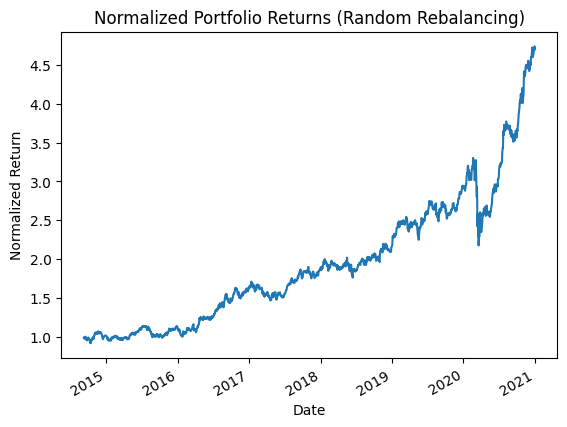

In [100]:
# Plot do um portfólio
normalized_portfolio_returns_random.plot(title='Normalized Portfolio Returns (Random Rebalancing)')
plt.xlabel('Date')
plt.ylabel('Normalized Return')
plt.show()

In [101]:
def simulate_portfolio():
    binary_array = random_array()
    weights_df_random = df_weights(returns, binary_array)
    normalized_portfolio_returns_random = random_rebalances_portfolio(returns, weights_df_random)
    
    cumulated_return = normalized_portfolio_returns_random.iloc[-1]
    return cumulated_return, binary_array, normalized_portfolio_returns_random

In [102]:
from joblib import Parallel, delayed

num_simulations = 30
simulated_portfolios = []
binarray_cumret_dict = {}

# Paralelizando a simulação
results = Parallel(n_jobs=-1)(delayed(simulate_portfolio)() for _ in range(num_simulations))

# Separando os resultados
for cumulated_return, binary_array, normalized_portfolio_returns_random in results:
    simulated_portfolios.append(normalized_portfolio_returns_random)
    binarray_cumret_dict[cumulated_return] = binary_array

# Convertendo para DataFrame
simulated_portfolios_df = pd.DataFrame(simulated_portfolios).T

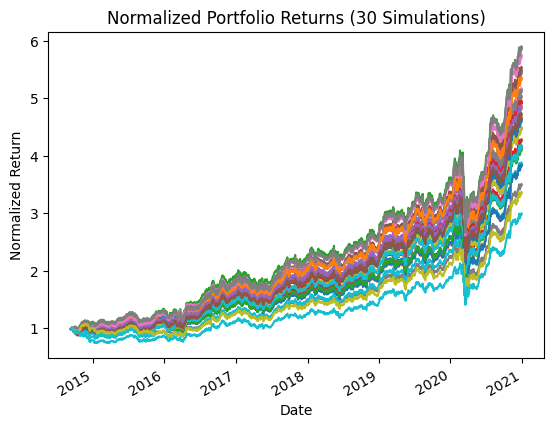

In [103]:
# Plot the results of the simulations
simulated_portfolios_df.plot(title=f'Normalized Portfolio Returns ({num_simulations} Simulations)', legend=False)
plt.xlabel('Date')
plt.ylabel('Normalized Return')
plt.show()

In [104]:
binarray_cumret_dict = dict(sorted(binarray_cumret_dict.items(), reverse=True))
binarray_cumret_dict

{5.851233857456175: array([0., 1., 0., ..., 0., 0., 0.]),
 5.850064210560549: array([0., 0., 0., ..., 0., 0., 1.]),
 5.71107514230947: array([0., 0., 0., ..., 0., 0., 1.]),
 5.499767342115814: array([0., 0., 0., ..., 1., 1., 0.]),
 5.444037106160056: array([0., 0., 0., ..., 1., 1., 0.]),
 5.423026511113069: array([0., 0., 0., ..., 0., 0., 0.]),
 5.318648644394743: array([0., 0., 0., ..., 0., 0., 0.]),
 5.132436740298278: array([0., 0., 0., ..., 1., 0., 0.]),
 5.104626674002787: array([0., 1., 0., ..., 1., 0., 1.]),
 5.007820684042126: array([0., 1., 0., ..., 0., 0., 1.]),
 4.917267489940318: array([0., 0., 0., ..., 0., 0., 0.]),
 4.904113785137318: array([0., 0., 0., ..., 0., 0., 1.]),
 4.835184108967495: array([0., 1., 0., ..., 0., 1., 0.]),
 4.80759045327616: array([0., 0., 0., ..., 1., 1., 0.]),
 4.702659508268998: array([0., 0., 0., ..., 0., 0., 1.]),
 4.641283736714452: array([0., 1., 0., ..., 0., 0., 0.]),
 4.622885270124051: array([0., 1., 0., ..., 1., 0., 0.]),
 4.5914209688708

In [105]:
# Quantidade de rebalanceamentos dos melhores portfólios
quantity = 10
top_arrays = list(binarray_cumret_dict.values())[:quantity]
ones_count = [np.sum(array) for array in top_arrays]
print(ones_count)
print(np.mean(ones_count))

[550.0, 496.0, 459.0, 481.0, 522.0, 523.0, 520.0, 359.0, 434.0, 452.0]
479.6


In [106]:
# Conectar ao banco de dados SQLite (ou criar um novo)
conn = sqlite3.connect(r"C:\databases\simulations.db")

simulated_portfolios_df.to_sql('simulated_portfolios', conn, if_exists='append', index=False)

def load_simulations_from_db(conn):
    return pd.read_sql('SELECT * FROM simulated_portfolios', conn)

loaded_simulations_db = load_simulations_from_db(conn)

conn.close()

# Penalização
#### IMPORTANTE: a princípio, mais rebalanceamentos dão melhores resultados, mas o retorno real dos portfólios precisam considerar **custo de rebalanceamento** -- existe um viés de quantidade de rebalanceamentos que é diferente de obter apenas os >momentos< bons de reb. -- como eliminar ou diminuir esse viés? 

In [107]:
def penalized_portfolio(returns, weights_df_random, trans_cost_rate=0.01, tax_rate=0.2):
    penalized_returns = returns.copy()  # Copiar os retornos para aplicar penalizações
    accumulated_return = (1 + penalized_returns).cumprod()  # Retorno acumulado até o momento
    
    for i in range(1, len(weights_df_random)):  # Começa em 1 para poder comparar com a linha anterior
        current_weights = weights_df_random.iloc[i].drop('rebalancing')  # Pesos atuais
        previous_weights = weights_df_random.iloc[i - 1].drop('rebalancing')  # Pesos anteriores
        
        # Identificar as colunas (ações) onde o peso atual é menor que o peso anterior (vendas)
        reduced_weight_cols = current_weights.index[current_weights < previous_weights]
        
        for col in reduced_weight_cols:
            weight_diff = previous_weights[col] - current_weights[col]  # Diferença de pesos (parte vendida)
            
            # Aplicar custo de transação: proporcional ao valor vendido
            transaction_cost = trans_cost_rate * weight_diff * returns.iloc[i, returns.columns.get_loc(col)]
            
            # Aplicar imposto sobre ganhos de capital se houver lucro na venda
            if returns.iloc[i, returns.columns.get_loc(col)] > 0:  # Apenas se houve lucro
                capital_gain_tax = tax_rate * weight_diff * returns.iloc[i, returns.columns.get_loc(col)]
            else:
                capital_gain_tax = 0
            
            # Ajustar o retorno penalizado subtraindo os custos e impostos
            penalized_returns.iloc[i, returns.columns.get_loc(col)] -= (transaction_cost + capital_gain_tax)

    # Calcular os retornos do portfólio ajustado com penalizações
    portfolio_returns = (penalized_returns * weights_df_random.drop('rebalancing', axis=1))

    # Normalizar os retornos para obter o retorno acumulado
    normalized_portfolio_returns = (1 + portfolio_returns.sum(axis=1)).cumprod()

    return normalized_portfolio_returns

In [108]:
def simulate_penalized_portfolio():
    binary_array = random_array()
    weights_df_random = df_weights(returns, binary_array)
    normalized_portfolio_returns_random = penalized_portfolio(returns, weights_df_random)
    
    cumulated_return = normalized_portfolio_returns_random.iloc[-1]
    return cumulated_return, binary_array, normalized_portfolio_returns_random

In [109]:
# teste para um porfólio
binary_array = random_array()
weights_df_random = df_weights(returns, binary_array)
normalized_portfolio_returns_random = penalized_portfolio(returns, weights_df_random)

You must convert self.cov to a positive definite matrix


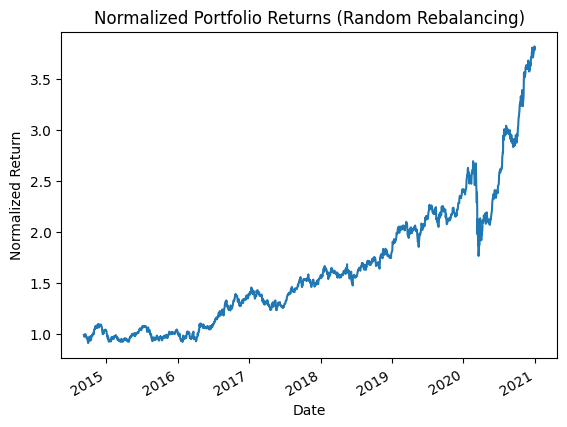

In [110]:
# Plot do um portfólio
normalized_portfolio_returns_random.plot(title='Normalized Portfolio Returns (Random Rebalancing)')
plt.xlabel('Date')
plt.ylabel('Normalized Return')
plt.show()

In [111]:
num_simulations = 30
simulated_portfolios = []
binarray_cumret_dict = {}

# Paralelizando a simulação
results = Parallel(n_jobs=-1)(delayed(simulate_penalized_portfolio)() for _ in range(num_simulations))

# Separando os resultados
for cumulated_return, binary_array, normalized_portfolio_returns_random in results:
    simulated_portfolios.append(normalized_portfolio_returns_random)
    binarray_cumret_dict[cumulated_return] = binary_array

# Convertendo para DataFrame
simulated_portfolios_df = pd.DataFrame(simulated_portfolios).T

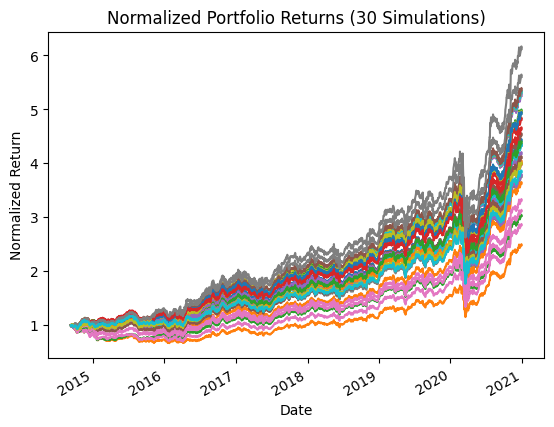

In [112]:
# Plot the results of the simulations
simulated_portfolios_df.plot(title=f'Normalized Portfolio Returns ({num_simulations} Simulations)', legend=False)
plt.xlabel('Date')
plt.ylabel('Normalized Return')
plt.show()

In [113]:
binarray_cumret_dict = dict(sorted(binarray_cumret_dict.items(), reverse=True))
binarray_cumret_dict

{6.117168139186289: array([0., 0., 0., ..., 0., 0., 0.]),
 5.599268024698466: array([0., 1., 0., ..., 0., 0., 0.]),
 5.352107062273494: array([0., 0., 0., ..., 0., 0., 0.]),
 5.3036012023633985: array([0., 0., 0., ..., 0., 0., 0.]),
 5.3033661223413056: array([0., 0., 0., ..., 1., 1., 1.]),
 5.246619383898499: array([0., 0., 0., ..., 0., 0., 0.]),
 4.955460329998016: array([0., 1., 0., ..., 1., 0., 0.]),
 4.930077674946852: array([0., 0., 0., ..., 1., 0., 0.]),
 4.912991480399649: array([0., 0., 0., ..., 0., 0., 0.]),
 4.805859430772648: array([0., 1., 0., ..., 0., 0., 0.]),
 4.62820454078925: array([0., 0., 0., ..., 1., 0., 0.]),
 4.517464475417931: array([0., 0., 0., ..., 1., 0., 0.]),
 4.414009026671141: array([0., 0., 0., ..., 0., 0., 0.]),
 4.372455440040279: array([0., 0., 0., ..., 0., 0., 0.]),
 4.32622017080866: array([0., 0., 0., ..., 0., 0., 0.]),
 4.320187722651979: array([0., 0., 0., ..., 0., 0., 1.]),
 4.1708665033190755: array([0., 1., 0., ..., 0., 0., 0.]),
 4.0939088220

In [114]:
# Quantidade de rebalanceamentos dos melhores portfólios
quantity = 50
top_arrays = list(binarray_cumret_dict.values())[:quantity]
ones_count = [np.sum(array) for array in top_arrays]
print(ones_count)
print(np.mean(ones_count))

[522.0, 546.0, 453.0, 527.0, 541.0, 526.0, 395.0, 438.0, 290.0, 365.0, 400.0, 422.0, 192.0, 423.0, 269.0, 456.0, 201.0, 380.0, 117.0, 313.0, 160.0, 131.0, 129.0, 228.0, 92.0, 111.0, 150.0, 166.0, 150.0, 73.0]
305.53333333333336


In [115]:
# Conectar ao banco de dados SQLite (ou criar um novo)
conn = sqlite3.connect(r"C:\databases\penalized_simulations.db")
simulated_portfolios_df.T.to_sql('simulated_portfolios', conn, if_exists='replace', index=False)

def load_simulations_from_db(conn):
    return pd.read_sql('SELECT * FROM simulated_portfolios', conn)

loaded_simulations_db = load_simulations_from_db(conn)

conn.close()